In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import warnings
warnings.filterwarnings("ignore")

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score

kaggle dataset

In [11]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("arshid/iris-flower-dataset")

print("Path to dataset files:", path)
print(os.listdir(path))

Using Colab cache for faster access to the 'iris-flower-dataset' dataset.
Path to dataset files: /kaggle/input/iris-flower-dataset
['.nfs0000000018b8178d00000b7d', 'IRIS.csv']


In [13]:
df = pd.read_csv(path + '/IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


EDA

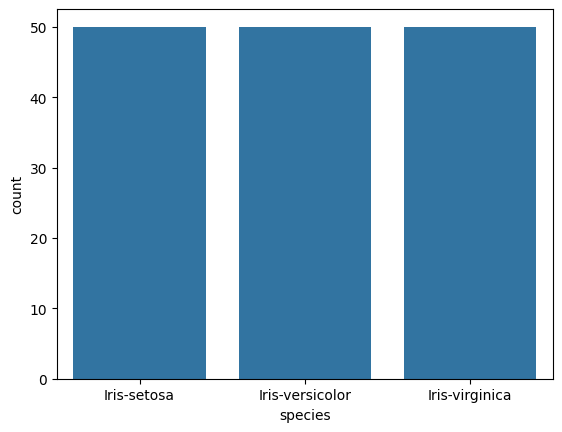

In [16]:
sns.countplot(x=df['species'])
plt.show()

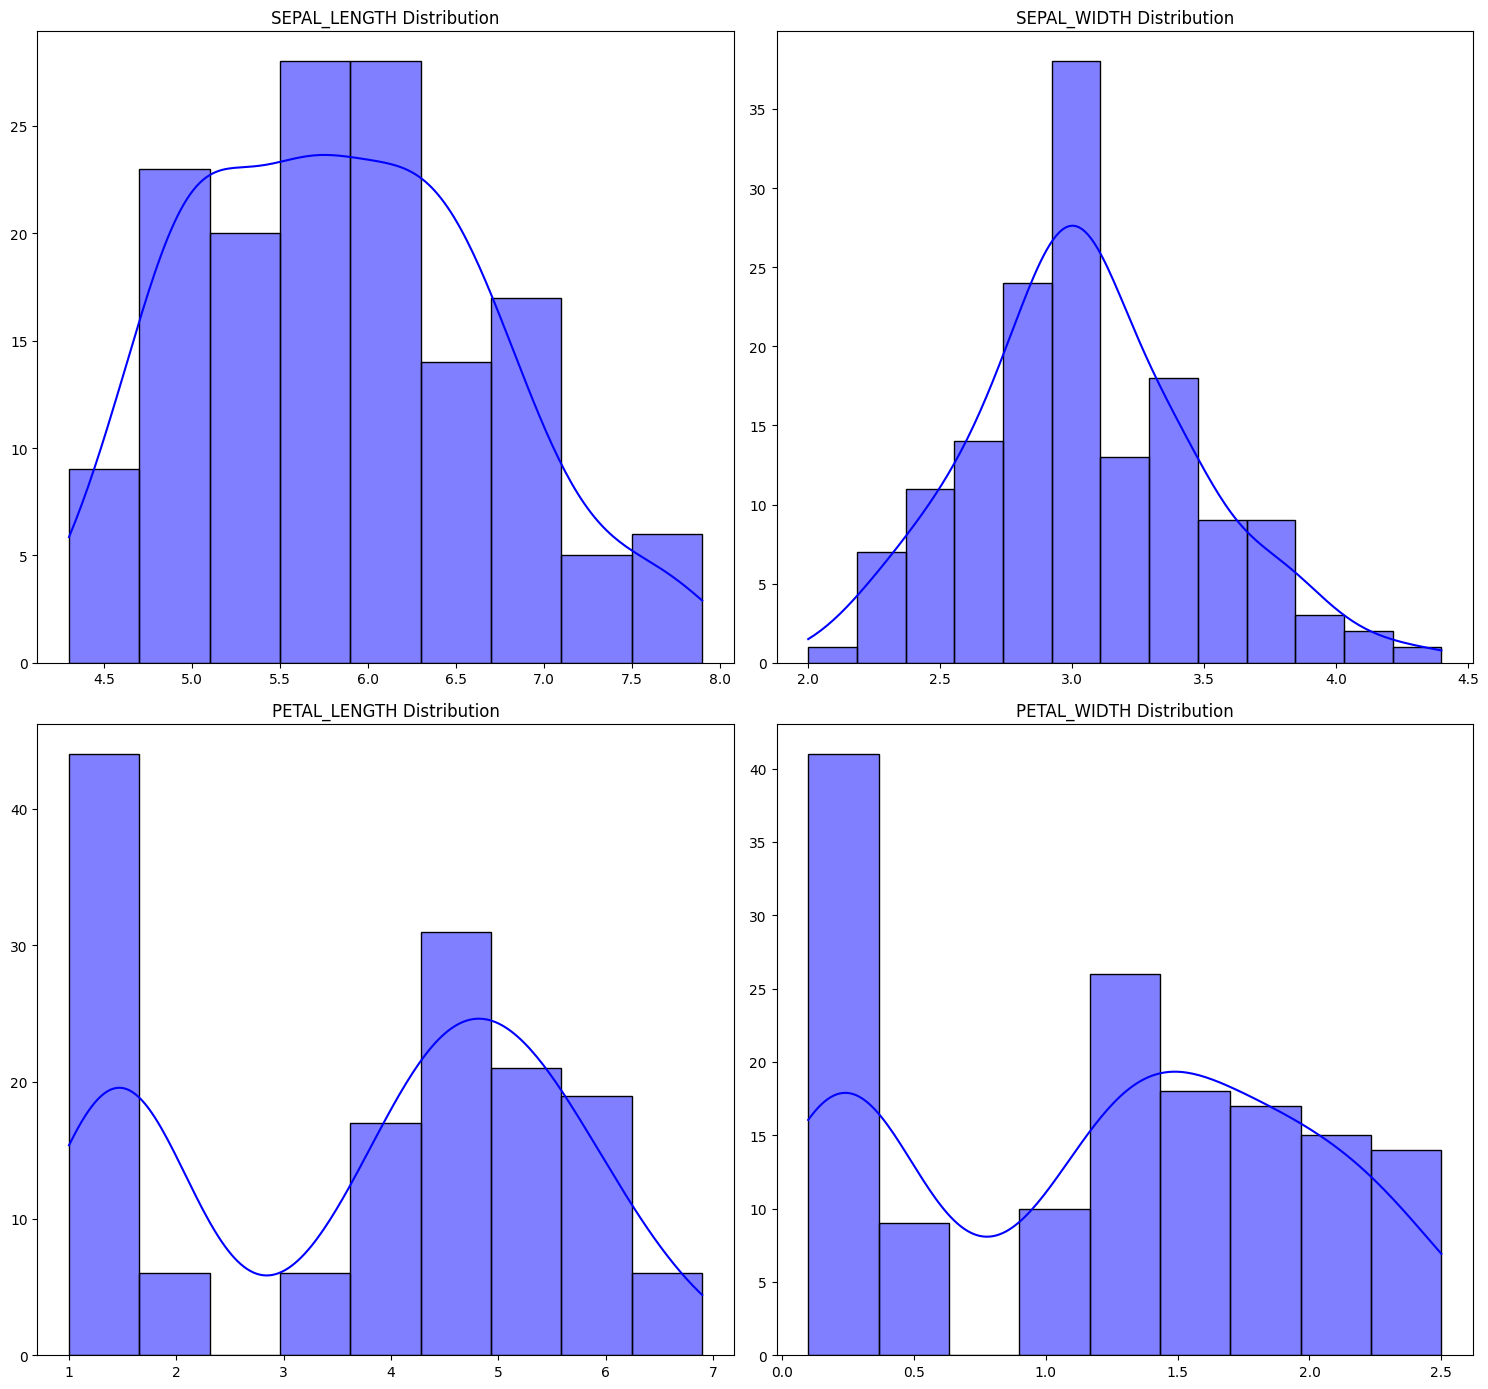

In [23]:
continous_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

plt.figure(figsize=(15,14))
for i, col in enumerate(continous_cols):
  plt.subplot(2,2,i+1)
  sns.histplot(df[col],color="b",kde=True)
  plt.title(col.upper() + " Distribution")
  plt.xlabel("")
  plt.ylabel("")

plt.tight_layout()

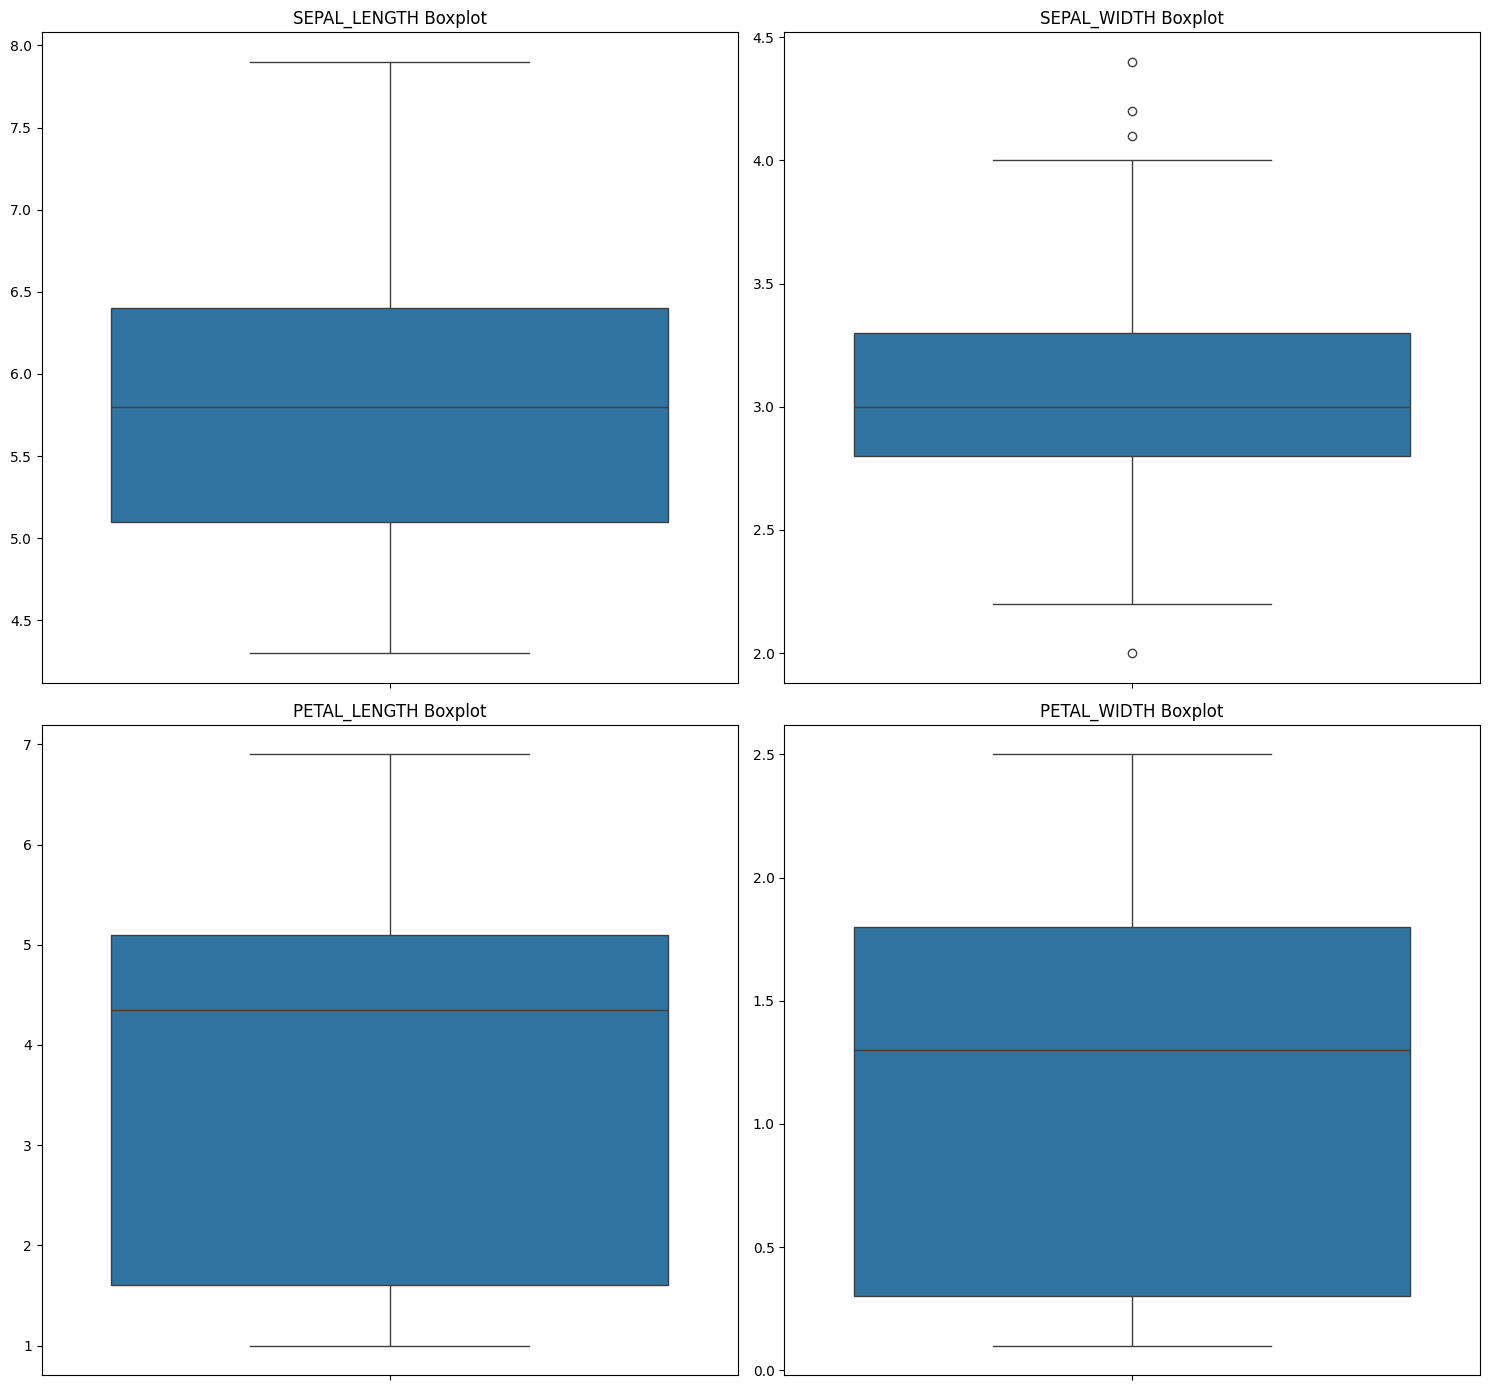

In [26]:
continous_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

plt.figure(figsize=(15,14))
for i, col in enumerate(continous_cols):
  plt.subplot(2,2,i+1)
  sns.boxplot(df[col])
  plt.title(col.upper() + " Boxplot")
  plt.xlabel("")
  plt.ylabel("")

plt.tight_layout()

Split data n Encode

In [72]:
X = df.drop('species', axis=1)
y = df['species']

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded)

Scaling

In [29]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Training

In [49]:
svm_linear = SVC(
    kernel = "linear",
    C=1,
    random_state=42
)

svm_rbf = SVC(
    kernel = "rbf",
    C=1,
    random_state=42
)

svm_linear.fit(X_train_scaled, y_train)
svm_rbf.fit(X_train_scaled, y_train)

SVC(C=1, random_state=42)

In [50]:
y_pred_linear = svm_linear.predict(X_test_scaled)
y_pred_rbf = svm_rbf.predict(X_test_scaled)

print("linear")
print("akurasi", accuracy_score(y_test, y_pred_linear))
print("presisi", precision_score(y_test, y_pred_linear, average='macro'))
print("recall", recall_score(y_test, y_pred_linear, average='macro'))
print("f1 score", f1_score(y_test, y_pred_linear, average='macro'))

print("\nrbf")
print("akurasi", accuracy_score(y_test, y_pred_rbf))
print("presisi", precision_score(y_test, y_pred_rbf, average='macro'))
print("recall", recall_score(y_test, y_pred_rbf, average='macro'))
print("f1 score", f1_score(y_test, y_pred_rbf, average='macro'))

linear
akurasi 1.0
presisi 1.0
recall 1.0
f1 score 1.0

rbf
akurasi 0.9666666666666667
presisi 0.9696969696969697
recall 0.9666666666666667
f1 score 0.9665831244778612


In [51]:
print(classification_report(y_test, y_pred_linear))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



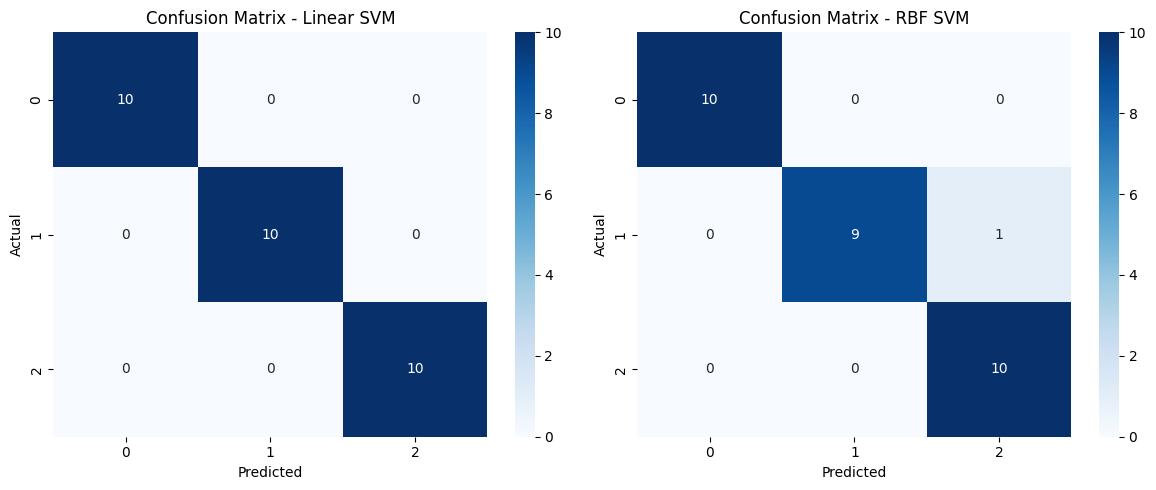

In [69]:
cm_l = confusion_matrix(y_test, y_pred_linear)
cm_rbf = confusion_matrix(y_test, y_pred_rbf)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm_l, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Linear SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1, 2, 2)
sns.heatmap(cm_rbf, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - RBF SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()

Decision Boundary

In [74]:
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6, 5))
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k")
    plt.title(title)
    plt.xlabel("Sepal Length (scaled)")
    plt.ylabel("Sepal Width (scaled)")
    plt.show()

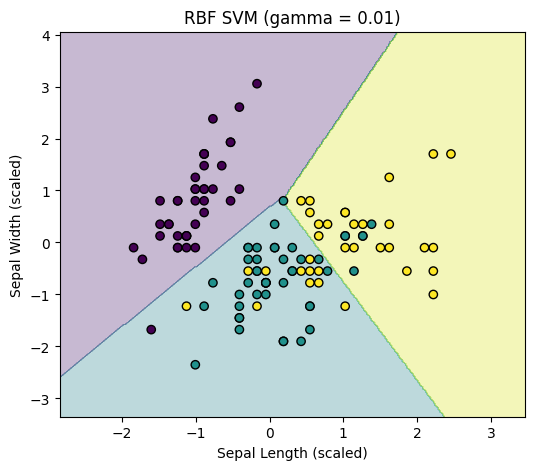

In [78]:
svm_gamma_s = SVC(kernel="rbf", C=1, gamma=0.01)
svm_gamma_s.fit(X_train_scaled, y_train)

plot_decision_boundary(
    svm_gamma_s,
    X_train_scaled,
    y_train,
    "RBF SVM (gamma = 0.01)"
)

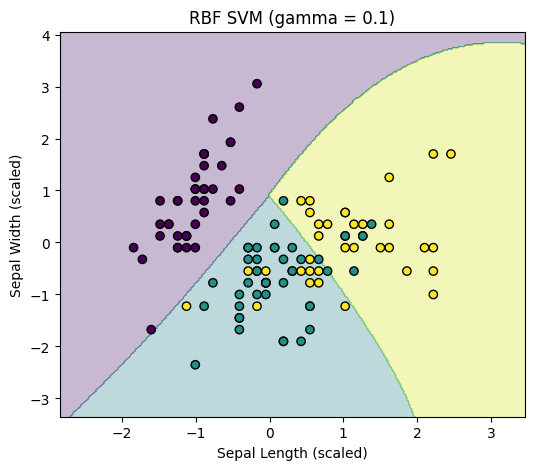

In [79]:
svm_gamma_m = SVC(kernel="rbf", C=1, gamma=0.1)
svm_gamma_m.fit(X_train_scaled, y_train)

plot_decision_boundary(
    svm_gamma_m,
    X_train_scaled,
    y_train,
    "RBF SVM (gamma = 0.1)"
)

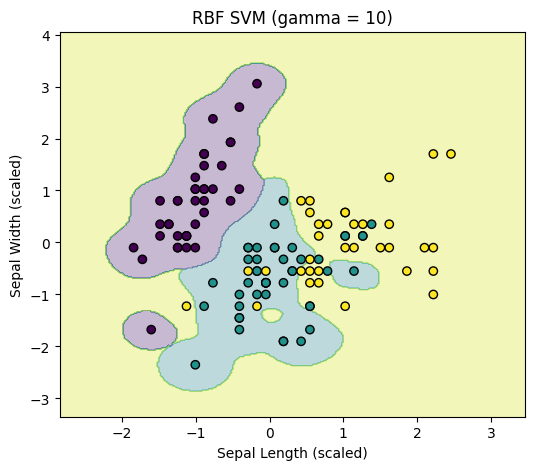

In [80]:
svm_gamma_l = SVC(kernel="rbf", C=1, gamma=10)
svm_gamma_l.fit(X_train_scaled, y_train)

plot_decision_boundary(
    svm_gamma_l,
    X_train_scaled,
    y_train,
    "RBF SVM (gamma = 10)"
)